In [ ]:
from helper import get_azure_llm, get_azure_embed_model

llm = get_azure_llm()
embed_model = get_azure_embed_model()

In [ ]:
import nest_asyncio

nest_asyncio.apply()

In [ ]:
urls = [
    "https://openreview.net/pdf?id=VtmBAGCN7o",
    "https://openreview.net/pdf?id=6PmJoRfdaK",
    "https://openreview.net/pdf?id=hSyW5go0v8",
]

papers = [
    "metagpt.pdf",
    "longlora.pdf",
    "selfrag.pdf",
]

In [ ]:
import os


def download_papers(urls, papers):
    for url, paper in zip(urls, papers):
        # check if paper already exists in ../data folder
        data_folder = "../data"

        # Construct the full path to the file
        file_path = os.path.join(data_folder, paper)

        # Check if the file exists
        if os.path.exists(file_path):
            print(f"The file '{paper}' already exists in the '{data_folder}' folder.")
        else:
            print(f"The file '{paper}' does not exist in the '{data_folder}' folder.")
            print("    downloading...")
            # in that case I want to download the paper using url and save it to ../data folder
            import requests

            response = requests.get(url)
            with open(file_path, "wb") as f:
                f.write(response.content)
            print("    downloaded!")

In [ ]:
download_papers(urls, papers)

The file 'metagpt.pdf' already exists in the '../data' folder.
The file 'longlora.pdf' already exists in the '../data' folder.
The file 'selfrag.pdf' already exists in the '../data' folder.


# agent over 3 papers

In [ ]:
from utils import get_doc_tools
from pathlib import Path

paper_to_tools_dict = {}
for paper in papers:
    print(f"Getting tools for paper: {paper}")
    vector_tool, summary_tool = get_doc_tools("../data/" + paper, Path(paper).stem)
    paper_to_tools_dict[paper] = [vector_tool, summary_tool]

Getting tools for paper: metagpt.pdf
Getting tools for paper: longlora.pdf
Getting tools for paper: selfrag.pdf


In [ ]:
initial_tools = [t for paper in papers for t in paper_to_tools_dict[paper]]

In [ ]:
len(initial_tools)

6

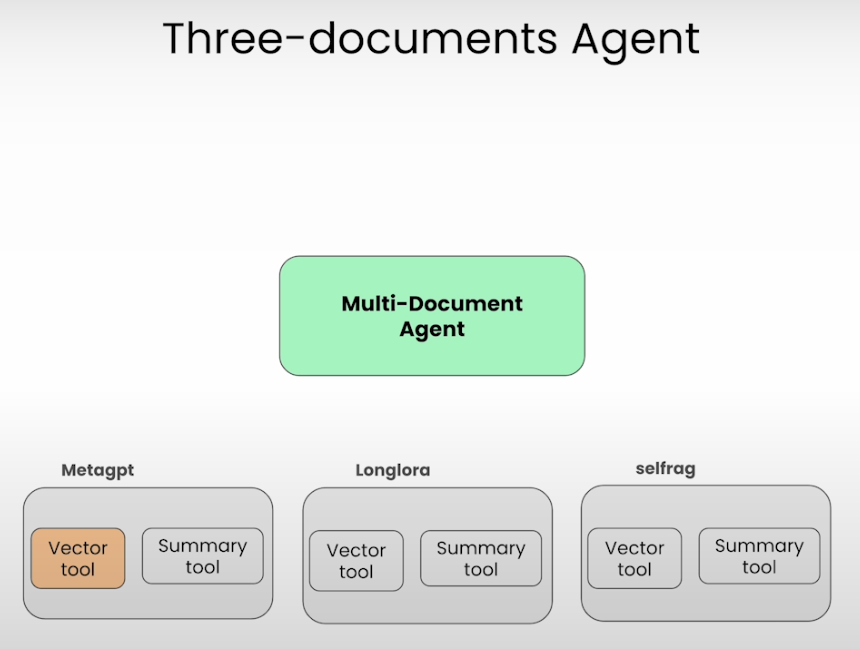

In [ ]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    initial_tools, llm=llm, verbose=True
)
agent = AgentRunner(agent_worker)

In [ ]:
response = agent.query(
    "Tell me about the evaluation dataset used in LongLoRA, "
    "and then tell me about the evaluation results"
)

Added user message to memory: Tell me about the evaluation dataset used in LongLoRA, and then tell me about the evaluation results
=== Calling Function ===
Calling function: vector_tool_longlora with args: {"query": "evaluation dataset used in LongLoRA"}
=== Function Output ===
The evaluation dataset used in LongLoRA is the proof-pile test set.
=== Calling Function ===
Calling function: vector_tool_longlora with args: {"query": "evaluation results in LongLoRA"}
=== Function Output ===
The evaluation results in LongLoRA indicate that it can efficiently extend the context length of LLMs to be significantly larger with less GPU memory cost and training time than standard full fine-tuning, while maintaining minimal accuracy compromise. Specifically, LongLoRA can extend Llama2 7B to a 100k context length and the 70B model to a 32k context length on a single 8 × A100 machine.
=== LLM Response ===
### Evaluation Dataset
The evaluation dataset used in LongLoRA is the proof-pile test set.

### 

In [ ]:
response = agent.query("Give me a summary of both Self-RAG and LongLoRA")
print(str(response))

Added user message to memory: Give me a summary of both Self-RAG and LongLoRA
=== Calling Function ===
Calling function: summary_tool_selfrag with args: {"input": " "}
=== Function Output ===
SELF-RAG is a framework that enhances the quality and factuality of large language models by incorporating retrieval and self-reflection mechanisms. It allows the model to retrieve relevant information on-demand and use reflection tokens to critique and improve its own output. This approach significantly outperforms other state-of-the-art models in tasks such as open-domain question answering, reasoning, and fact verification. The framework includes a generator model and a critic model, which work together to ensure the relevance and accuracy of the generated text. Evaluation metrics for long-form generation tasks, such as biography generation and long-form QA, show that SELF-RAG performs better than other models, including ChatGPT, in various benchmarks.
=== Calling Function ===
Calling function:

# agent over 11 papers

In [ ]:
urls = [
    "https://openreview.net/pdf?id=VtmBAGCN7o",
    "https://openreview.net/pdf?id=6PmJoRfdaK",
    "https://openreview.net/pdf?id=LzPWWPAdY4",
    "https://openreview.net/pdf?id=VTF8yNQM66",
    "https://openreview.net/pdf?id=hSyW5go0v8",
    "https://openreview.net/pdf?id=9WD9KwssyT",
    "https://openreview.net/pdf?id=yV6fD7LYkF",
    "https://openreview.net/pdf?id=hnrB5YHoYu",
    "https://openreview.net/pdf?id=WbWtOYIzIK",
    "https://openreview.net/pdf?id=c5pwL0Soay",
]

papers = [
    "metagpt.pdf",
    "longlora.pdf",
    "loftq.pdf",
    "swebench.pdf",
    "selfrag.pdf",
    "zipformer.pdf",
    "values.pdf",
    "finetune_fair_diffusion.pdf",
    "knowledge_card.pdf",
    "metra.pdf",
]

In [ ]:
download_papers(urls, papers)

The file 'metagpt.pdf' already exists in the '../data' folder.
The file 'longlora.pdf' already exists in the '../data' folder.
The file 'loftq.pdf' already exists in the '../data' folder.
The file 'swebench.pdf' already exists in the '../data' folder.
The file 'selfrag.pdf' already exists in the '../data' folder.
The file 'zipformer.pdf' already exists in the '../data' folder.
The file 'values.pdf' already exists in the '../data' folder.
The file 'finetune_fair_diffusion.pdf' already exists in the '../data' folder.
The file 'knowledge_card.pdf' already exists in the '../data' folder.
The file 'metra.pdf' already exists in the '../data' folder.


In [ ]:
from utils import get_doc_tools
from pathlib import Path

paper_to_tools_dict = {}
for paper in papers:
    print(f"Getting tools for paper: {paper}")
    vector_tool, summary_tool = get_doc_tools("../data/" + paper, Path(paper).stem)
    paper_to_tools_dict[paper] = [vector_tool, summary_tool]

Getting tools for paper: metagpt.pdf
Getting tools for paper: longlora.pdf
Getting tools for paper: loftq.pdf
Getting tools for paper: swebench.pdf
Getting tools for paper: selfrag.pdf
Getting tools for paper: zipformer.pdf
Getting tools for paper: values.pdf
Getting tools for paper: finetune_fair_diffusion.pdf
Getting tools for paper: knowledge_card.pdf
Getting tools for paper: metra.pdf


In [ ]:
all_tools = [t for paper in papers for t in paper_to_tools_dict[paper]]

## extend with tool retrieval

In [ ]:
# define an "object" index and retriever over these tools
from llama_index.core import VectorStoreIndex
from llama_index.core.objects import ObjectIndex

obj_index = ObjectIndex.from_objects(
    all_tools,
    index_cls=VectorStoreIndex,
)

In [ ]:
obj_retriever = obj_index.as_retriever(similarity_top_k=3)

In [ ]:
tools = obj_retriever.retrieve(
    "Tell me about the eval dataset used in MetaGPT and SWE-Bench"
)

In [ ]:
tools[2].metadata

ToolMetadata(description='Use ONLY IF you want to get a holistic summary of MetaGPT. Do NOT use if you have specific questions over MetaGPT.', name='summary_tool_values', fn_schema=<class 'llama_index.core.tools.types.DefaultToolFnSchema'>, return_direct=False)

In [ ]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    tool_retriever=obj_retriever,
    llm=llm,
    system_prompt=""" \
You are an agent designed to answer queries over a set of given papers.
Please always use the tools provided to answer a question. Do not rely on prior knowledge.\

""",
    verbose=True,
)
agent = AgentRunner(agent_worker)

In [ ]:
response = agent.query(
    "Tell me about the evaluation dataset used "
    "in MetaGPT and compare it against SWE-Bench"
)
print(str(response))

Added user message to memory: Tell me about the evaluation dataset used in MetaGPT and compare it against SWE-Bench
=== Calling Function ===
Calling function: summary_tool_metra with args: {"input": "evaluation dataset"}
=== Function Output ===
The evaluation dataset includes five robotic locomotion and manipulation environments: state-based Ant and HalfCheetah from Gym, pixel-based Quadruped and Humanoid from the DeepMind Control Suite, and a pixel-based version of Kitchen. These environments are used to assess various metrics such as policy coverage, state coverage, and downstream task performance.
=== Calling Function ===
Calling function: summary_tool_swebench with args: {"input": "evaluation dataset"}
=== Function Output ===
An evaluation dataset is a collection of data used to assess the performance of a model or system. It typically includes a set of inputs and the corresponding expected outputs, allowing for the comparison of the model's predictions against the actual results. 

In [ ]:
response = agent.query(
    "Compare and contrast the LoRA papers (LongLoRA, LoftQ). "
    "Analyze the approach in each paper first. "
)

Added user message to memory: Compare and contrast the LoRA papers (LongLoRA, LoftQ). Analyze the approach in each paper first. 
=== Calling Function ===
Calling function: summary_tool_longlora with args: {"input": "Analyze the approach in LongLoRA paper"}
=== Function Output ===
The approach in the LongLoRA paper focuses on efficiently extending the context length of large language models (LLMs) while minimizing computational costs. Key innovations include the use of Shifted Sparse Attention (S2-Attn) and an improved version of Low-Rank Adaptation (LoRA+). S2-Attn reduces the computational cost of self-attention by splitting the input into groups and shifting tokens to ensure information flow between groups, approximating long context training while retaining the original attention architecture during inference. LoRA+ enhances the standard LoRA method by making the normalization and embedding layers trainable, which significantly improves performance for long-context adaptation.

The 